# 线性SVM

In [2]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [5]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


# visualize data (可视化数据)
左边边缘有异常数据

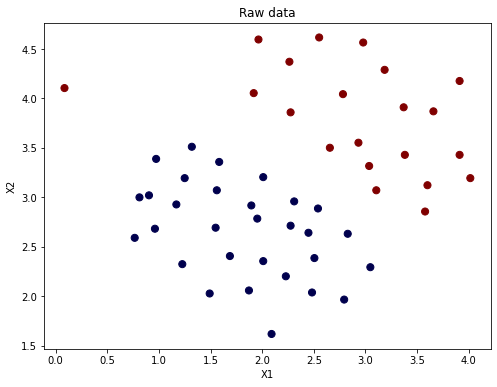

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='seismic')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# try $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [8]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge', max_iter=10000) # ‘hinge’ 是标准的 SVM 损失函数, max_iter 迭代次数
svc1.fit(data[['X1', 'X2']], data['y']) # 根据给定的 training set 拟合模型
svc1.score(data[['X1', 'X2']], data['y']) # 返回给定测试数据和标签的准确度

0.9803921568627451

decision_function() 决策函数输出表示分类器对x_test的预测样本是位于超平面(决策边界)的右侧还是左侧，以及离它有多远。它还告诉我们分类器为x_test预测的每个值是正的(大幅度正值)还是负的(大幅度负值)。

返回值大于0，证明预测为1，小于0，证明预测为0

In [10]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']]) 
data['SVM1 Confidence']

0     0.802757
1     0.383836
2     1.377395
3     0.521081
4     0.333309
5     0.868594
6     0.686426
7     1.611097
8     0.834394
9     1.167045
10    1.073140
11    0.229719
12    0.331755
13    0.795729
14    0.315715
15    1.273994
16    1.210089
17    0.999869
18    0.564649
19    0.389806
20   -0.435286
21   -0.308865
22   -0.686272
23   -0.554036
24   -0.332527
25   -0.293862
26   -0.440723
27   -0.983998
28   -0.685644
29   -1.328484
30   -1.003800
31   -1.492311
32   -0.611434
33   -0.683458
34   -1.000048
35   -1.152750
36   -1.578415
37   -1.355990
38   -1.032408
39   -1.185051
40   -0.771425
41   -0.766938
42   -0.466518
43   -1.000000
44   -0.510350
45   -0.858647
46   -1.559029
47   -0.254910
48   -1.113658
49   -1.547198
50   -0.709963
Name: SVM1 Confidence, dtype: float64

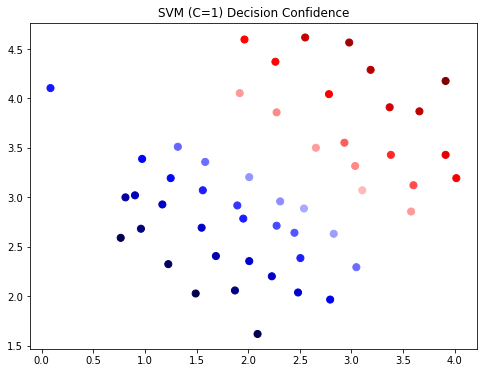

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

> 可以从上图看到当 C =1 时， 左侧边缘情况被归于左侧

# try $C=10000$
with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [21]:
svc100 = sklearn.svm.LinearSVC(C=10000, loss='hinge', max_iter=1000000)
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

1.0

In [22]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])
data['SVM100 Confidence']

0     16.227375
1      8.035568
2     20.574803
3      7.091066
4      1.000070
5      7.472679
6      7.587769
7     19.851502
8     12.821729
9     19.247379
10    13.832123
11     1.601693
12     8.910062
13    14.682405
14     5.126925
15    17.928020
16    14.645855
17    10.069557
18     4.592363
19     4.494189
20    -1.767488
21    -1.782768
22    -7.547188
23    -6.973890
24    -3.594406
25    -5.455083
26    -8.852878
27   -14.846877
28   -10.182106
29   -17.439486
30   -12.904328
31   -16.975399
32    -6.074017
33    -5.628696
34   -10.640313
35   -13.745604
36   -19.620859
37   -13.526749
38    -9.339733
39   -10.074612
40    -4.226528
41    -5.477203
42    -0.999847
43   -13.890498
44    -7.101713
45   -14.328749
46   -22.176055
47    -3.454237
48    -9.373036
49   -15.650060
50     1.000000
Name: SVM100 Confidence, dtype: float64

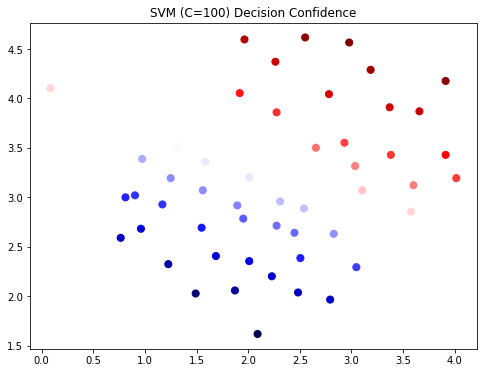

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [24]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.802757,16.227375
1,2.2753,3.8589,1,0.383836,8.035568
2,2.9781,4.5651,1,1.377395,20.574803
3,2.9320,3.5519,1,0.521081,7.091066
4,3.5772,2.8560,1,0.333309,1.000070
